In [10]:
import numpy as np
import math
import qiskit
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.quantum_info import Statevector

In [11]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

#### Bloch Sphere representation

In [12]:
# complex numbers

a = 1 + 4j
b = 2 - 3j

norm = np.sqrt(abs(a**2) + abs(b**2))
some_state = [a/norm, b/norm]

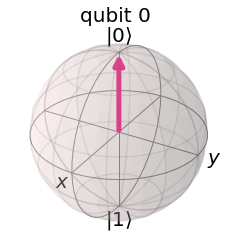

In [13]:
q0_state = np.array([1, 0])
plot_bloch_multivector(q0_state)

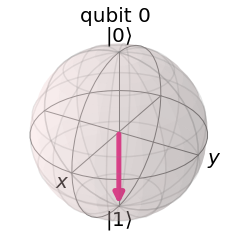

In [14]:
q1_state = np.array([0, 1])
plot_bloch_multivector(q1_state)

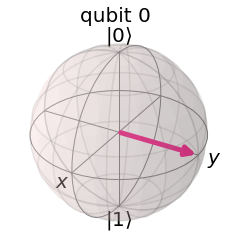

In [15]:
# combined state
q0_q1 = q0_state + 1j * q1_state
mag = np.sqrt(abs(q0_q1[0]**2) + abs(q0_q1[1]**2))

new_state = q0_q1 / mag
plot_bloch_multivector(new_state)

#### Quantum Gates

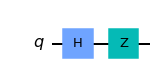

In [16]:
qc = QuantumCircuit(1) # one qubit

# apply hadmard gate, then z gate
qc.h(0)
qc.z(0)

qc.draw("mpl")

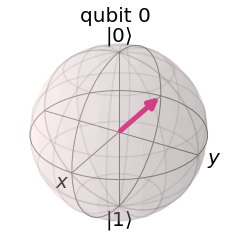

In [17]:
# evolove on qc
sv = Statevector.from_label("0")
state_evolve = sv.evolve(qc)

plot_bloch_multivector(state_evolve)

#### Measurements

In [18]:
# create a simple circuit
circ = QuantumCircuit(1)

#initial_state = [0, 1]
initial_state = [math.sqrt(1/2), math.sqrt(1/2)]
circ.initialize(initial_state, 0)
circ.measure_all()

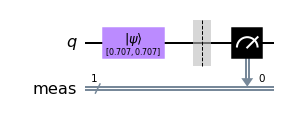

In [4]:
circ.draw("mpl")

In [5]:
simulator = Aer.get_backend("aer_simulator")
circ = transpile(circ, simulator)

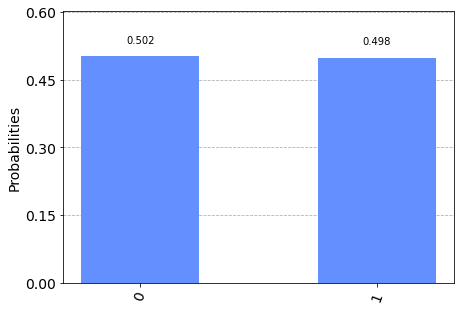

In [6]:
# run the circuit
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)